In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping


# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, y_train), (test_images, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [25]:
y_testst

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

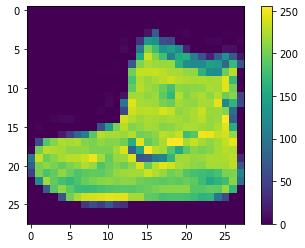

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
x_train = train_images.reshape(-1,28,28,1).astype('float32') / 255.0

x_test = test_images.reshape(-1,28,28,1).astype('float32') / 255.0

In [22]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1983 - accuracy: 0.9262
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1860 - accuracy: 0.9304
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1696 - accuracy: 0.9363
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1577 - accuracy: 0.9413
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1502 - accuracy: 0.9434
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1394 - accuracy: 0.9476
Epoch 7/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1337 - accuracy: 0.9494
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1258 - accuracy: 0.9524
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1199 - accuracy: 0.9552
Epoch 10/10
60000/60000 [==============================

In [ ]:
# from keras.models import load_model
# del model

In [ ]:
# model = load_model('model/mnist-cnn-15-0.0282.hdf5')

In [28]:
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy : 0.9278
